Рубежный контроль №2

Данилин М.С. ИУ5-64Б Вариант №5

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д. ИУ5-64Б, ИУ5Ц-84Б Линейная/логистическая регрессия Градиентный бустинг

Датасет: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

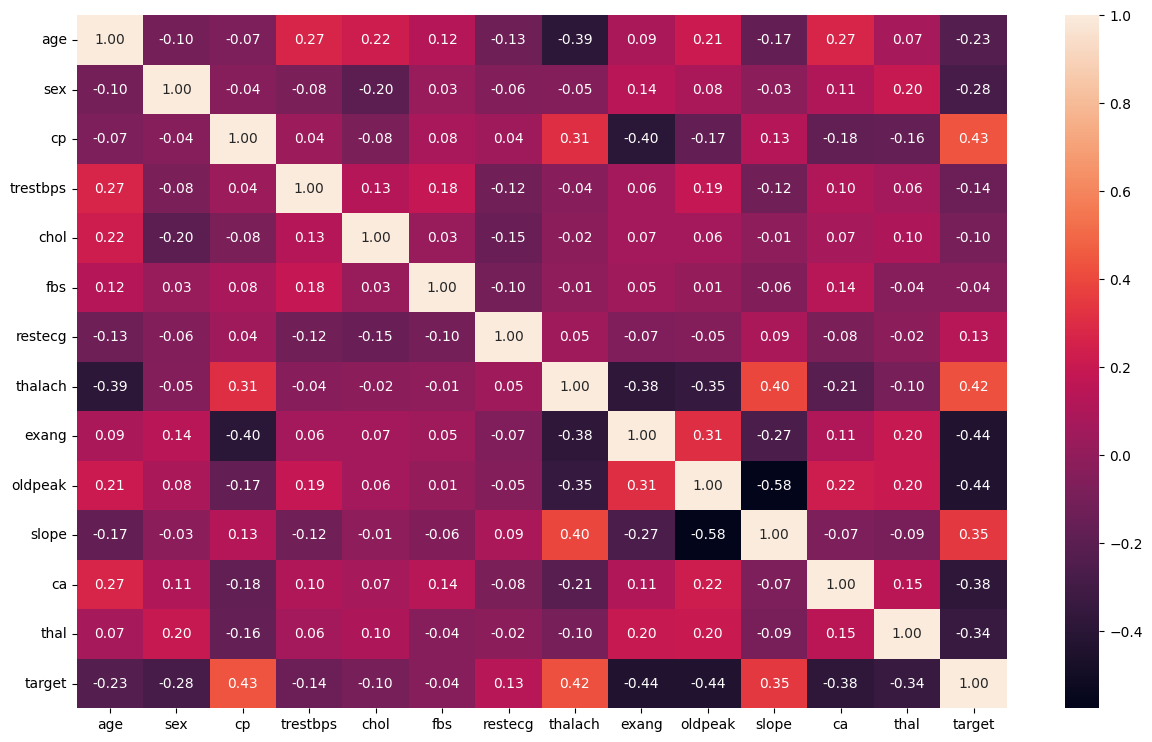

In [4]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax, annot=True, fmt=".2f")

In [5]:
X = data[['cp', 'thalach', 'exang', 'oldpeak', 'ca']]
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

Метрики

In [6]:
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

# Линейная регрессия

In [7]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

# Градиентный бустинг

In [8]:
gb_model = GradientBoostingRegressor(random_state=17)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

Сравнение моделей

In [9]:
print("Линейная регрессия")
print_metrics(y_test, y_pred_linear)

print("\nГрадиентный бустинг")
print_metrics(y_test, y_pred_gb)

Линейная регрессия
R^2: 0.4230074839454927
MSE: 0.14415081200973842
MAE: 0.3030697611158199

Градиентный бустинг
R^2: 0.6607773233398611
MSE: 0.08474845501818704
MAE: 0.2036582063725091


Из двух использованных моделей, модель градиентного бустинга оказалась лучше по всем использованным метрикам